# Predicting Car Prices Using K-Nearest Neighbors

This project will analyze a data set of cars, and use features from each record to make a prediction about what the car's price should be, based on the K-Nearest Neighbors machine learning algorithm.

In [3]:
import pandas as pd

columns = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

# import csv file into dataframe
cars = pd.read_csv('imports-85.data', header=None)

In [4]:
# set column names in datafram

cars.columns = columns

# verify column names
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
import numpy as np

# replace ? characters with NaN in the whole dataframe
cars = cars.replace('?', np.nan)

In [6]:
# determine which string columns to convert to numeric
cars['num_doors'].value_counts(dropna=False)

four    114
two      89
NaN       2
Name: num_doors, dtype: int64

In [7]:
cars['num_cylinders'].value_counts(dropna=False)

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num_cylinders, dtype: int64

In [8]:
# drop 2 rows that have NaN for num_doors
cars = cars.dropna(subset=['num_doors'])

In [9]:
# verify new values for num_doors
cars['num_doors'].value_counts(dropna=False)

four    114
two      89
Name: num_doors, dtype: int64

In [10]:
# conert num_doors and num_cylinders to int data types - imputes missing values to 4 doors
new_doors = []

for doors in cars['num_doors']:
    if doors == 'four':
        new_doors.append(4)
    elif doors == 'two':
        new_doors.append(2)

# assign transformed values back to dataframe
cars['num_doors'] = new_doors

new_cylinders = []

for cyl in cars['num_cylinders']:
    if cyl == 'four':
        new_cylinders.append(4)
    if cyl == 'six':
        new_cylinders.append(6)
    if cyl == 'five':
        new_cylinders.append(5)
    if cyl == 'eight':
        new_cylinders.append(8)
    if cyl == 'two':
        new_cylinders.append(2)
    if cyl == 'twelve':
        new_cylinders.append(12)
    if cyl == 'three':
        new_cylinders.append(3)

# assign back to dataframe
cars['num_cylinders'] = new_cylinders

# verify the new colum values
cars['num_doors'].value_counts()

4    114
2     89
Name: num_doors, dtype: int64

In [11]:
# verify column values for num_cylinders
cars['num_cylinders'].value_counts()

4     157
6      24
5      11
8       5
2       4
12      1
3       1
Name: num_cylinders, dtype: int64

In [12]:
# determine if other data type conversions are required
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 26 columns):
symboling            203 non-null int64
normalized_losses    163 non-null object
make                 203 non-null object
fuel_type            203 non-null object
aspiration           203 non-null object
num_doors            203 non-null int64
body_style           203 non-null object
drive_wheels         203 non-null object
engine_location      203 non-null object
wheel_base           203 non-null float64
length               203 non-null float64
width                203 non-null float64
height               203 non-null float64
curb_weight          203 non-null int64
engine_type          203 non-null object
num_cylinders        203 non-null int64
engine_size          203 non-null int64
fuel_system          203 non-null object
bore                 199 non-null object
stroke               199 non-null object
compression_ratio    203 non-null float64
horsepower           201 non-null 

In [13]:
# convert horsepower to float
cars['horsepower'] = cars['horsepower'].astype(float)

In [14]:
# convert peak_rpm to float
cars['peak_rpm'] = cars['peak_rpm'].astype(float)

In [15]:
# verify the changes
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 26 columns):
symboling            203 non-null int64
normalized_losses    163 non-null object
make                 203 non-null object
fuel_type            203 non-null object
aspiration           203 non-null object
num_doors            203 non-null int64
body_style           203 non-null object
drive_wheels         203 non-null object
engine_location      203 non-null object
wheel_base           203 non-null float64
length               203 non-null float64
width                203 non-null float64
height               203 non-null float64
curb_weight          203 non-null int64
engine_type          203 non-null object
num_cylinders        203 non-null int64
engine_size          203 non-null int64
fuel_system          203 non-null object
bore                 199 non-null object
stroke               199 non-null object
compression_ratio    203 non-null float64
horsepower           201 non-null 

In [16]:
# view number of missing rows for normalized_losses - index 0 was NaN for this column
cars['normalized_losses'].value_counts(dropna=False)[0]

40

In [17]:
# drop normalized_losses column due to many missing values
cars = cars.drop(columns=['normalized_losses'])

In [18]:
# verify the column has been dropped
cars.columns

Index(['symboling', 'make', 'fuel_type', 'aspiration', 'num_doors',
       'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'num_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [19]:
# verify NaN values for price (it was index 0 in full results)
cars['price'].value_counts(dropna=False)[0]

4

In [20]:
# drop rows where price is NaN
cars = cars.dropna(subset=['price'])

In [21]:
# verify the new values
cars['price'].value_counts(dropna=False)

7775     2
8845     2
6229     2
7295     2
18150    2
8495     2
7898     2
6692     2
16500    2
13499    2
5572     2
9279     2
7957     2
8921     2
7609     2
22470    1
9233     1
12629    1
14869    1
18620    1
10198    1
16430    1
9988     1
16558    1
6918     1
7349     1
12764    1
9639     1
5118     1
7995     1
        ..
8013     1
15510    1
6295     1
7126     1
25552    1
5195     1
37028    1
11245    1
9989     1
9549     1
11048    1
23875    1
6849     1
18399    1
10945    1
7999     1
7788     1
12170    1
12440    1
5499     1
18280    1
15580    1
16900    1
36000    1
6669     1
30760    1
20970    1
15040    1
13200    1
11850    1
Name: price, Length: 184, dtype: int64

In [22]:
# convert price column to numeric
cars['price'] = cars['price'].astype(float)

In [23]:
# include only numeric columns for KNN algorithm
cars = cars.select_dtypes(exclude=['object'])

# verify new columns
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 15 columns):
symboling            199 non-null int64
num_doors            199 non-null int64
wheel_base           199 non-null float64
length               199 non-null float64
width                199 non-null float64
height               199 non-null float64
curb_weight          199 non-null int64
num_cylinders        199 non-null int64
engine_size          199 non-null int64
compression_ratio    199 non-null float64
horsepower           197 non-null float64
peak_rpm             197 non-null float64
city_mpg             199 non-null int64
highway_mpg          199 non-null int64
price                199 non-null float64
dtypes: float64(8), int64(7)
memory usage: 24.9 KB


In [24]:
# impute mean values for horsepower and peak_rpm null values
cars = cars.fillna(cars.mean())

# verify null values
cars.isnull().sum()

symboling            0
num_doors            0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
num_cylinders        0
engine_size          0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [25]:
# normalize numeric values in dataframe to prepare for KNN algorithm
price = cars['price']
cars = (cars - cars.min()) / (cars.max() - cars.min())
cars['price'] = price

In [26]:
# verify normalized values
cars.head()

,symboling,num_doors,wheel_base,length,width,height,curb_weight,num_cylinders,engine_size,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,1.0,0.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.2,0.260377,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,1.0,0.0,0.058309,0.413433,0.324786,0.083333,0.411171,0.2,0.260377,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.6,0.0,0.230321,0.449254,0.444444,0.383333,0.517843,0.4,0.343396,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.8,1.0,0.384840,0.529851,0.504274,0.541667,0.329325,0.2,0.181132,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.8,1.0,0.373178,0.529851,0.521368,0.541667,0.518231,0.3,0.283019,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


In [27]:
cars.shape

(199, 15)

## Univariate K-Nearest Neighbor Model

This section of the project will implement a univariate model, which uses only 1 feature from the data set to make a prediction for the target column. The default K value of 5 will be used for this model.

In [28]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# create a Univariate Model to predice price based on 1 feature
def knn_train_test(feature, target_col, df):
    df_length = len(df)
    
    # shuffle data
    random_indexes = np.random.permutation(df.index)
    df = df.reindex(random_indexes)
    
    # split data into test and train sets
    eighty_pct = round(df_length * 0.8)
    train_set = df[:eighty_pct]
    test_set = df[eighty_pct:]
    
    # train KNN model
    model = KNeighborsRegressor()
    model.fit(train_set[[feature]], train_set[target_col])
    predictions = model.predict(test_set[[feature]])
    
    # calculate RMSE
    rmse = sqrt(mean_squared_error(test_set[target_col], predictions))
    return rmse

In [29]:
# test univariate model with many features

car_cols = ['symboling', 'num_doors', 'wheel_base', 'length', 'width', 'height',
        'curb_weight', 'num_cylinders', 'engine_size', 'compression_ratio',
        'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg']

for col in car_cols:
     ft_rmse = knn_train_test(col, 'price', cars)
     print('For {} feature, RMSE is {}'.format(col, ft_rmse))

For symboling feature, RMSE is 7803.063812631549
For num_doors feature, RMSE is 8527.66204155629
For wheel_base feature, RMSE is 3201.4107602742884
For length feature, RMSE is 5053.942838814068
For width feature, RMSE is 5936.5376314818395
For height feature, RMSE is 5949.288954656682
For curb_weight feature, RMSE is 4640.702415044515
For num_cylinders feature, RMSE is 4683.769553895666
For engine_size feature, RMSE is 3482.4677422770196
For compression_ratio feature, RMSE is 5917.7487594523645
For horsepower feature, RMSE is 3240.962459517234
For peak_rpm feature, RMSE is 9407.458950428643
For city_mpg feature, RMSE is 4455.871434523217
For highway_mpg feature, RMSE is 3919.5613112949254


## Modified K Value

The code below modifies the knn_train_test function to accept a parameter for the K value, and will test the RMSE for several different values of K.

In [30]:
# create a Univariate Model to predice price based on 1 feature, but with adjustable K value
def knn_train_test_k(feature, target_col, df, k):
    df_length = len(df)
    
    # shuffle data
    random_indexes = np.random.permutation(df.index)
    df = df.reindex(random_indexes)
    
    # split data into test and train sets
    eighty_pct = round(df_length * 0.8)
    train_set = df[:eighty_pct]
    test_set = df[eighty_pct:]
    
    # train KNN model
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(train_set[[feature]], train_set[target_col])
    predictions = model.predict(test_set[[feature]])
    
    # calculate RMSE
    rmse = sqrt(mean_squared_error(test_set[target_col], predictions))
    return rmse

In [31]:
# test using several different K values
k_vals = [1, 3, 5, 7]
rmses = {}

for val in k_vals:
    l_rmses = []
    for col in car_cols:
        ft_rmse = knn_train_test_k(col, 'price', cars, val)
        l_rmses.append(ft_rmse)
    
    # compute average for K value
    avg_rmse = np.mean(l_rmses)
    rmses[val] = avg_rmse

In [32]:
# verify the output
print(rmses)

{1: 6436.2123585948475, 3: 5669.341740911658, 5: 5692.528492464089, 7: 5520.323921344529}


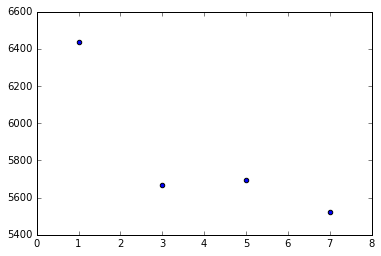

In [33]:
from matplotlib import pyplot as plt
%matplotlib inline

k_values = list(rmses.keys())
rmse_values = list(rmses.values())

# visualize the output
plt.scatter(k_values, rmse_values)
plt.show()

## K Value Analysis

As seen in the plot above, the average RMSE value across all numeric columns was the lowest when the K value was 3.

## Multivariate K-Nearest Neighbor

The code below is a modification of the previously defined function that will use multiple features of the data set instead of just 1 in order to make predictions.

In [36]:
# create a Multivariate Model to predice price based on multiple columns, using default K value
def knn_train_test_multiple(features, target_col, df):
    df_length = len(df)
    
    # shuffle data
    random_indexes = np.random.permutation(df.index)
    df = df.reindex(random_indexes)
    
    # split data into test and train sets
    eighty_pct = round(df_length * 0.8)
    train_set = df[:eighty_pct]
    test_set = df[eighty_pct:]
    
    # train KNN model
    model = KNeighborsRegressor()
    model.fit(train_set[features], train_set[target_col])
    predictions = model.predict(test_set[features])
    
    # calculate RMSE
    rmse = sqrt(mean_squared_error(test_set[target_col], predictions))
    return rmse

In [37]:
# train the new multivariate model using the features with lowest RMSE values from previous steps
best_two = ['highway_mpg', 'engine_size']
best_three = ['highway_mpg', 'engine_size', 'horsepower']
best_four = ['highway_mpg', 'engine_size', 'horsepower', 'curb_weight']
best_five = ['highway_mpg', 'engine_size', 'horsepower', 'curb_weight', 'num_cylinders']

# train each set of features
two_rmse = knn_train_test_multiple(best_two, 'price', cars)
three_rmse = knn_train_test_multiple(best_three, 'price', cars)
four_rmse = knn_train_test_multiple(best_four, 'price', cars)
five_rmse = knn_train_test_multiple(best_five, 'price', cars)

print('Two RMSE: {}'.format(two_rmse))
print('Three RMSE: {}'.format(three_rmse))
print('Four RMSE: {}'.format(four_rmse))
print('Five RMSE: {}'.format(five_rmse))

Two RMSE: 2930.11936565731
Three RMSE: 3180.909680107249
Four RMSE: 3540.7777693608505
Five RMSE: 3188.1715954446368


## Hyperparameter Optimization

Using the top 3 performing models from the previous step, modify the K value to see what number of neighbors produces the smallest RMSE, and ultimately, the most accurate predictions.

In [38]:
# define multivariate model function that accepts K as a parameter
def knn_train_test_multiple_k(features, target_col, df, k):
    df_length = len(df)
    
    # shuffle data
    random_indexes = np.random.permutation(df.index)
    df = df.reindex(random_indexes)
    
    # split data into test and train sets
    eighty_pct = round(df_length * 0.8)
    train_set = df[:eighty_pct]
    test_set = df[eighty_pct:]
    
    # train KNN model
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(train_set[features], train_set[target_col])
    predictions = model.predict(test_set[features])
    
    # calculate RMSE
    rmse = sqrt(mean_squared_error(test_set[target_col], predictions))
    return rmse    

In [45]:
best_features = [best_two, best_three, best_five]

k_dict = {}

# train the models using 1 through 25 nearest neighbors
for k in range(1, 26):
    rmse_dict_temp = {}
    for ftr in best_features:
        if ftr == best_two:
            indicator = 2
        elif ftr == best_three:
            indicator = 3
        else:
            indicator = 5
        temp_rmses = knn_train_test_multiple_k(ftr, 'price', cars, k)
        rmse_dict_temp[indicator] = temp_rmses
    k_dict[k] = rmse_dict_temp

In [46]:
# verify the results
print(k_dict)

{1: {2: 2671.8972192058586, 3: 3016.438006987712, 5: 3026.981437835389}, 2: {2: 2893.1068151297145, 3: 1698.2285844373248, 5: 3171.873877339703}, 3: {2: 2577.7528688331968, 3: 2981.751711103167, 5: 3642.564049997382}, 4: {2: 2837.2462628841367, 3: 3377.890186103598, 5: 2092.659044134997}, 5: {2: 3458.1800086172493, 3: 3272.846951814276, 5: 3769.55055835573}, 6: {2: 2490.1840006201237, 3: 2253.6713083260884, 5: 3123.5809920488523}, 7: {2: 3544.2938612648923, 3: 1965.0887950545587, 5: 3058.534925134141}, 8: {2: 3202.0191597817425, 3: 2554.8826125797837, 5: 2767.738935174568}, 9: {2: 4547.514230731302, 3: 4088.819705445812, 5: 3152.2090879666052}, 10: {2: 3066.0573111489616, 3: 3688.971665586495, 5: 3085.04008312696}, 11: {2: 5079.93395191169, 3: 4477.789841087946, 5: 3963.8723556466225}, 12: {2: 3820.3566740345436, 3: 3052.140448214171, 5: 4250.31019850398}, 13: {2: 5579.974249240703, 3: 3348.1093697451324, 5: 3324.531922963703}, 14: {2: 3845.895172940885, 3: 3954.1744287376414, 5: 2591.

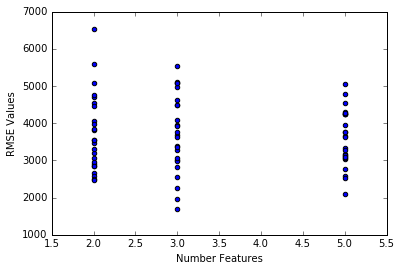

In [66]:
from matplotlib.font_manager import FontProperties

for i, m in k_dict.items():
    best_num = list(m.keys())
    rmse_values = list(m.values())
    plt.scatter(best_num, rmse_values)

neighbor_list = [i for i in range(1, 26)]
plt.xlabel('Number Features')
plt.ylabel('RMSE Values')
plt.show()

In [88]:
# find K value that corresponds with lowest RMSE for 3 features
three_features_rmses = []

for i, m in k_dict.items():
    # print RMSE values for 3 features
    three_features_rmses.append(m[3])

# iterator for K values in outer dictionary
k = 1
for r in three_features_rmses:
    # print K value that corresponds with RMSE
    print(k, r)
    k += 1

1 3016.438006987712
2 1698.2285844373248
3 2981.751711103167
4 3377.890186103598
5 3272.846951814276
6 2253.6713083260884
7 1965.0887950545587
8 2554.8826125797837
9 4088.819705445812
10 3688.971665586495
11 4477.789841087946
12 3052.140448214171
13 3348.1093697451324
14 3954.1744287376414
15 2816.092303746847
16 3750.1424960556706
17 4981.347904457409
18 5086.563939661873
19 5120.925343606587
20 5076.134129796758
21 3930.7748433056013
22 5546.560180811121
23 4621.182947556027
24 4502.371757993649
25 3642.190448919441


## K Value Conclusion

As shown in the scatterplot, the RMSE value is lowest when using 3 features to make predictions. Of the RMSE values for 3 features, the RMSE is lowest when K = 2.